In [288]:
#import all packages 
import pandas as pd
import warnings
import statsmodels.api as sm
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats
import statsmodels.api as sm
import seaborn as sns
from sklearn.preprocessing import StandardScaler
warnings.filterwarnings('ignore')
from sklearn.preprocessing import OneHotEncoder

data = pd.read_csv('../data/kc_house_data.csv')

In [289]:
data.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016772,0.001150,0.005162,-0.012241,-0.131911,0.018608,-0.010799,0.021617,-0.012010,-0.008211,-0.001798,0.020672,-0.002701,-0.138557
price,-0.016772,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.605368,0.053953,0.129599,-0.053402,0.306692,0.022036,0.585241,0.082845
bedrooms,0.001150,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,0.479386,0.155670,0.018495,-0.154092,-0.009951,0.132054,0.393406,0.030690
bathrooms,0.005162,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.686668,0.507173,0.051050,-0.204786,0.024280,0.224903,0.569884,0.088303
sqft_living,-0.012241,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.876448,0.318152,0.055660,-0.199802,0.052155,0.241214,0.756402,0.184342
sqft_lot,-0.131911,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,0.184139,0.052946,0.004513,-0.129586,-0.085514,0.230227,0.144763,0.718204
floors,0.018608,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,0.523989,0.489193,0.003535,-0.059541,0.049239,0.125943,0.280102,-0.010722
sqft_above,-0.010799,0.605368,0.479386,0.686668,0.876448,0.184139,0.523989,1.000000,0.424037,0.022137,-0.261570,-0.001199,0.344842,0.731767,0.195077
yr_built,0.021617,0.053953,0.155670,0.507173,0.318152,0.052946,0.489193,0.424037,1.000000,-0.225209,-0.347210,-0.148370,0.409993,0.326377,0.070777
yr_renovated,-0.012010,0.129599,0.018495,0.051050,0.055660,0.004513,0.003535,0.022137,-0.225209,1.000000,0.069846,0.032145,-0.072156,-0.000247,0.003852


In [290]:
# drop columns that have no desire to our stakeholder 
clean_null = data.drop(columns=['id','date','long','yr_built','condition','view', 'waterfront', 'yr_renovated'], axis=1)


In [358]:
# locating outliers in bedroom 
clean_null = clean_null.loc[clean_null['bedrooms'] < 5]
clean_null = clean_null.loc[clean_null['bathrooms'] < 3]
clean_null = clean_null.loc[clean_null['sqft_living'] < 6000 ]
clean_null = clean_null.loc[clean_null['price'] < 1200000 ]
clean_null = clean_null.loc[clean_null['bedrooms'] > .95]
clean_null = clean_null.loc[clean_null['bathrooms'] > .95]
clean_null = clean_null.loc[clean_null['sqft_living'] > 500 ]
clean_null = clean_null.loc[clean_null['price'] > 100000 ]

In [359]:
clean_null = clean_null.loc[clean_null['sqft_basement'] != '?' ] 

In [360]:
clean_null['sqft_basement'] = clean_null['sqft_basement'].astype(float)

In [361]:
clean_null['true_sqft'] = clean_null['sqft_living']  - clean_null['sqft_basement']
clean_null

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,grade,sqft_above,sqft_basement,zipcode,lat,sqft_living15,sqft_lot15,true_sqft,price_per_sqft,grade_ordinal
0,221900.0,3,1.00,1180,5650,1.0,7 Average,1180,0.0,98178,47.5112,1340,5650,1180.0,188.050847,7
1,538000.0,3,2.25,2570,7242,2.0,7 Average,2170,400.0,98125,47.7210,1690,7639,2170.0,247.926267,7
2,180000.0,2,1.00,770,10000,1.0,6 Low Average,770,0.0,98028,47.7379,2720,8062,770.0,233.766234,6
4,510000.0,3,2.00,1680,8080,1.0,8 Good,1680,0.0,98074,47.6168,1800,7503,1680.0,303.571429,8
7,291850.0,3,1.50,1060,9711,1.0,7 Average,1060,0.0,98198,47.4095,1650,9711,1060.0,275.330189,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21589,610685.0,4,2.50,2520,6023,2.0,9 Better,2520,0.0,98056,47.5137,2520,6023,2520.0,242.335317,9
21591,475000.0,3,2.50,1310,1294,2.0,8 Good,1180,130.0,98116,47.5773,1330,1265,1180.0,402.542373,8
21592,360000.0,3,2.50,1530,1131,3.0,8 Good,1530,0.0,98103,47.6993,1530,1509,1530.0,235.294118,8
21593,400000.0,4,2.50,2310,5813,2.0,8 Good,2310,0.0,98146,47.5107,1830,7200,2310.0,173.160173,8


In [362]:
# creating a new feature of price per sqft
clean_null['price_per_sqft'] = clean_null['price']  / clean_null['true_sqft']
clean_null

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,grade,sqft_above,sqft_basement,zipcode,lat,sqft_living15,sqft_lot15,true_sqft,price_per_sqft,grade_ordinal
0,221900.0,3,1.00,1180,5650,1.0,7 Average,1180,0.0,98178,47.5112,1340,5650,1180.0,188.050847,7
1,538000.0,3,2.25,2570,7242,2.0,7 Average,2170,400.0,98125,47.7210,1690,7639,2170.0,247.926267,7
2,180000.0,2,1.00,770,10000,1.0,6 Low Average,770,0.0,98028,47.7379,2720,8062,770.0,233.766234,6
4,510000.0,3,2.00,1680,8080,1.0,8 Good,1680,0.0,98074,47.6168,1800,7503,1680.0,303.571429,8
7,291850.0,3,1.50,1060,9711,1.0,7 Average,1060,0.0,98198,47.4095,1650,9711,1060.0,275.330189,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21589,610685.0,4,2.50,2520,6023,2.0,9 Better,2520,0.0,98056,47.5137,2520,6023,2520.0,242.335317,9
21591,475000.0,3,2.50,1310,1294,2.0,8 Good,1180,130.0,98116,47.5773,1330,1265,1180.0,402.542373,8
21592,360000.0,3,2.50,1530,1131,3.0,8 Good,1530,0.0,98103,47.6993,1530,1509,1530.0,235.294118,8
21593,400000.0,4,2.50,2310,5813,2.0,8 Good,2310,0.0,98146,47.5107,1830,7200,2310.0,173.160173,8


In [363]:
test = [i[0:2].strip() for i in clean_null['grade']]


In [364]:
clean_null['grade_ordinal'] = [int(i[0:2].strip()) for i in clean_null['grade']]

In [365]:
zip_home_size = clean_null.loc[clean_null['zipcode'].isin([98052,98102,98103,98105,98109,98119,98121,98134,98164])]



In [366]:
curated_zip = np.array([98052,98102,98103,98105,98109,98119,98121,98134,98164])

In [367]:

# TODO add these OHE'd columns to main data by assigning <dfname>['zipcodes_ohe']
#
# take out the isin function for all zipcodes, if that makes the OLS work. could also narrow down to curated after the OHE on all zipcodes
zips = clean_null.loc[clean_null['zipcode'].isin(curated_zip)].dropna() 
ohe = OneHotEncoder(sparse=False, drop=[98109]) # the zip code with the highest prices in Seattle. could do 98052, near the Microsoft campus as well
ohe.fit(zips['zipcode'].to_numpy().reshape(-1, 1))
zips_encoded = ohe.transform(zips['zipcode'].to_numpy().reshape(-1, 1))

zipcodes_ohe = pd.DataFrame(zips_encoded, columns=ohe.get_feature_names(), index=zips.index)

In [368]:
zip_home_size.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'grade', 'sqft_above', 'sqft_basement', 'zipcode', 'lat',
       'sqft_living15', 'sqft_lot15', 'true_sqft', 'price_per_sqft',
       'grade_ordinal'],
      dtype='object')

In [369]:
zip_new_columns = zip_home_size.drop(columns=['zipcode','grade','price_per_sqft','sqft_above'], axis=1)
#zip_new_columns.reset_index(inplace=True, drop=True)
zip_new_columns

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_basement,lat,sqft_living15,sqft_lot15,true_sqft,grade_ordinal
17,485000.0,4,1.00,1600,4300,1.5,0.0,47.6648,1610,4300,1600.0,7
26,937000.0,3,1.75,2450,2691,2.0,700.0,47.6386,1760,3573,1750.0,8
29,719000.0,4,2.50,2570,7173,2.0,0.0,47.7073,2630,6026,2570.0,8
36,550000.0,4,1.00,1660,34848,1.0,730.0,47.6621,2160,11467,930.0,5
43,685000.0,3,1.00,1570,2280,2.0,0.0,47.6413,1580,2640,1570.0,7
...,...,...,...,...,...,...,...,...,...,...,...,...
21541,530000.0,3,2.50,1410,1250,2.0,270.0,47.6515,1720,2825,1140.0,8
21567,399950.0,2,1.00,710,1157,2.0,0.0,47.6413,1370,1173,710.0,7
21576,475000.0,3,2.25,1190,1200,3.0,0.0,47.6542,1180,1224,1190.0,8
21579,520000.0,2,2.25,1530,981,3.0,50.0,47.6533,1530,1282,1480.0,8


In [370]:
# concat two dataframes 
zip_ohe_columns = pd.concat([zip_new_columns , zipcodes_ohe], axis=1)
zip_ohe_columns

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_basement,lat,sqft_living15,sqft_lot15,true_sqft,grade_ordinal,x0_98052,x0_98102,x0_98103,x0_98105,x0_98119
17,485000.0,4,1.00,1600,4300,1.5,0.0,47.6648,1610,4300,1600.0,7,0.0,0.0,1.0,0.0,0.0
26,937000.0,3,1.75,2450,2691,2.0,700.0,47.6386,1760,3573,1750.0,8,0.0,0.0,0.0,0.0,1.0
29,719000.0,4,2.50,2570,7173,2.0,0.0,47.7073,2630,6026,2570.0,8,1.0,0.0,0.0,0.0,0.0
36,550000.0,4,1.00,1660,34848,1.0,730.0,47.6621,2160,11467,930.0,5,1.0,0.0,0.0,0.0,0.0
43,685000.0,3,1.00,1570,2280,2.0,0.0,47.6413,1580,2640,1570.0,7,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21541,530000.0,3,2.50,1410,1250,2.0,270.0,47.6515,1720,2825,1140.0,8,0.0,0.0,0.0,0.0,1.0
21567,399950.0,2,1.00,710,1157,2.0,0.0,47.6413,1370,1173,710.0,7,0.0,1.0,0.0,0.0,0.0
21576,475000.0,3,2.25,1190,1200,3.0,0.0,47.6542,1180,1224,1190.0,8,0.0,0.0,1.0,0.0,0.0
21579,520000.0,2,2.25,1530,981,3.0,50.0,47.6533,1530,1282,1480.0,8,0.0,0.0,1.0,0.0,0.0


In [371]:
zip_ohe_columns.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_basement,lat,sqft_living15,sqft_lot15,true_sqft,grade_ordinal,x0_98052,x0_98102,x0_98103,x0_98105,x0_98119
price,1.000000,0.402323,0.311011,0.661090,0.169477,0.037821,0.213887,-0.211823,0.553097,0.147292,0.558384,0.487346,0.009532,0.087816,-0.249894,0.067632,0.159952
bedrooms,0.402323,1.000000,0.418092,0.636316,0.295457,0.036158,0.206950,0.116845,0.432124,0.268113,0.536865,0.300356,0.362321,-0.067389,-0.248050,-0.036877,-0.040474
bathrooms,0.311011,0.418092,1.000000,0.593711,0.157137,0.436576,0.149029,0.103594,0.384532,0.155086,0.525157,0.586465,0.375339,0.003381,-0.273450,-0.089008,-0.024740
sqft_living,0.661090,0.636316,0.593711,1.000000,0.420442,0.104022,0.309582,0.174968,0.723037,0.407498,0.852316,0.594016,0.468787,-0.055867,-0.337550,-0.074686,-0.050717
sqft_lot,0.169477,0.295457,0.157137,0.420442,1.000000,-0.251174,0.058201,0.282350,0.477851,0.874421,0.397931,0.210766,0.561007,-0.116428,-0.311621,-0.098184,-0.135805
floors,0.037821,0.036158,0.436576,0.104022,-0.251174,1.000000,-0.376277,0.037822,-0.007973,-0.260244,0.313344,0.443479,-0.112253,0.086917,0.125834,-0.080083,0.015678
sqft_basement,0.213887,0.206950,0.149029,0.309582,0.058201,-0.376277,1.000000,-0.126325,0.038660,0.046598,-0.233469,-0.095117,-0.051028,0.005922,-0.068714,0.077798,0.083613
lat,-0.211823,0.116845,0.103594,0.174968,0.282350,0.037822,-0.126325,1.000000,0.127803,0.283832,0.248408,0.044901,0.329000,-0.329630,0.216915,-0.043029,-0.369153
sqft_living15,0.553097,0.432124,0.384532,0.723037,0.477851,-0.007973,0.038660,0.127803,1.000000,0.482090,0.718114,0.547155,0.539407,-0.025767,-0.461028,-0.041742,-0.046122
sqft_lot15,0.147292,0.268113,0.155086,0.407498,0.874421,-0.260244,0.046598,0.283832,0.482090,1.000000,0.391077,0.214828,0.575394,-0.125222,-0.326997,-0.090632,-0.131386


In [372]:
zip_ohe_columns.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1343 entries, 17 to 21592
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          1343 non-null   float64
 1   bedrooms       1343 non-null   int64  
 2   bathrooms      1343 non-null   float64
 3   sqft_living    1343 non-null   int64  
 4   sqft_lot       1343 non-null   int64  
 5   floors         1343 non-null   float64
 6   sqft_basement  1343 non-null   float64
 7   lat            1343 non-null   float64
 8   sqft_living15  1343 non-null   int64  
 9   sqft_lot15     1343 non-null   int64  
 10  true_sqft      1343 non-null   float64
 11  grade_ordinal  1343 non-null   int64  
 12  x0_98052       1343 non-null   float64
 13  x0_98102       1343 non-null   float64
 14  x0_98103       1343 non-null   float64
 15  x0_98105       1343 non-null   float64
 16  x0_98119       1343 non-null   float64
dtypes: float64(11), int64(6)
memory usage: 188.9 KB


In [373]:

y = zip_ohe_columns['price']
x = zip_ohe_columns['sqft_living']
X_c = sm.add_constant(x)


simple_model = sm.OLS(y, X_c)


simple_model_results = simple_model.fit()
print(simple_model_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.437
Model:                            OLS   Adj. R-squared:                  0.437
Method:                 Least Squares   F-statistic:                     1041.
Date:                Wed, 26 Oct 2022   Prob (F-statistic):          1.63e-169
Time:                        21:32:00   Log-Likelihood:                -17713.
No. Observations:                1343   AIC:                         3.543e+04
Df Residuals:                    1341   BIC:                         3.544e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        2.831e+05   1.06e+04     26.588      

In [374]:
#reviewing coef and p value significants 
y = zip_ohe_columns['price']
X = zip_ohe_columns.drop(['price'], axis=1)





y = y.dropna()
X = X.dropna()

# len(y), len(X)
ols_kch = sm.OLS(y, sm.add_constant(X)).fit()
ols_kch.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.690
Method:                 Least Squares   F-statistic:                     199.9
Date:                Wed, 26 Oct 2022   Prob (F-statistic):               0.00
Time:                        21:32:02   Log-Likelihood:                -17306.
No. Observations:                1343   AIC:                         3.464e+04
Df Residuals:                    1327   BIC:                         3.473e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          6.827e+07   6.91e+06      9.884      0.000    5.47e+07    8.18e+07
bedrooms       1.108e+04   4789.281      2.314      0.021    1689.265    2.05e+04
bathrooms     -1841.7295   7245.204     -0.254      0.799   -1.61e+04    1.24e+04
sqft_living     101.5747      5.516     18.415      0.000      90.754     112.395
sqft_lot          1.2150      0.937      1.297      0.195      -0.623       3.053
floors        -5.284e+04   6254.983     -8.448      0.000   -6.51e+04   -4.06e+04
sqft_basement    19.0225      6.524      2.916      0.004       6.223      31.822
lat           -1.432e+06   1.45e+05     -9.877      0.000   -1.72e+06   -1.15e+06
sqft_living15    67.8755      8.364      8.115      0.000      51.467      84.284
sqft_lot15       -1.5498      1.118     -1.386      0.166      -3.743       0.644
true_sqft        82.5543      5.588     14.772      0.000      71.591      93.517
grade_ordinal  3.838e+04   4707.497      8.152      0.000    2.91e+04    4.76e+04
x0_98052      -1.855e+05   1.44e+04    -12.848      0.000   -2.14e+05   -1.57e+05
x0_98102      -2.328e+04   1.64e+04     -1.421      0.156   -5.54e+04    8862.620
x0_98103      -2.778e+04   1.36e+04     -2.039      0.042   -5.45e+04   -1048.914
x0_98105      -9994.5077   1.46e+04     -0.685      0.494   -3.86e+04    1.86e+04
x0_98119        989.6330   1.44e+04      0.069      0.945   -2.72e+04    2.92e+04
==============================================================================
Omnibus:                       39.869   Durbin-Watson:                   1.962
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               84.651
Skew:                           0.146   Prob(JB):                     4.15e-19
Kurtosis:                       4.195   Cond. No.                     9.31e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is  2e-23. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [375]:
#identifying the lots we recommend the stakeholder purchase and build new multifamily homes. 

zip_lot_size = clean_null.loc[(clean_null['zipcode'].isin([98052,98102,98103,98105,98109,98119,98121,98134,98164]))
                              & (clean_null['sqft_lot'] >= 40000)]

zip_lot_size

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,grade,sqft_above,sqft_basement,zipcode,lat,sqft_living15,sqft_lot15,true_sqft,price_per_sqft,grade_ordinal
340,485000.0,4,1.75,2560,43995,2.0,7 Average,2560,0.0,98052,47.6945,2560,14764,2560.0,189.453125,7
2580,965000.0,4,2.50,4070,57587,2.0,10 Very Good,4070,0.0,98052,47.6908,3890,35960,4070.0,237.100737,10
2956,900000.0,4,2.50,3620,42580,2.0,10 Very Good,3620,0.0,98052,47.7204,2950,33167,3620.0,248.618785,10
3671,620000.0,3,2.25,2190,45738,1.0,8 Good,2190,0.0,98052,47.7108,2970,4496,2190.0,283.105023,8
6024,822000.0,4,2.50,2683,40386,2.0,9 Better,2683,0.0,98052,47.6982,2683,34800,2683.0,306.373463,9
6578,550000.0,3,2.25,1980,40887,1.0,8 Good,1980,0.0,98052,47.6478,2460,35700,1980.0,277.777778,8
9829,830000.0,4,2.50,1850,50662,1.0,8 Good,1430,420.0,98052,47.6535,2090,10599,1430.0,580.419580,8
17024,838000.0,4,2.50,3310,42998,2.0,9 Better,3310,0.0,98052,47.7232,3350,42847,3310.0,253.172205,9
17323,476800.0,3,1.75,1900,43700,1.5,6 Low Average,1900,0.0,98052,47.7265,2070,43995,1900.0,250.947368,6
17516,870000.0,4,2.00,3090,41147,1.0,7 Average,3090,0.0,98052,47.6748,3300,34280,3090.0,281.553398,7


In [376]:
#Linearity
X = zip_ohe_columns(['price'], axis=1)
ss = StandardScaler().fit(X)

X_scaled = ss.transform(X)

TypeError: 'DataFrame' object is not callable

In [377]:
X_c = sm.add_constant(X_scaled)
y = clean_null['price']

NameError: name 'X_scaled' is not defined

In [378]:
model = sm.OLS(endog=y, exog=X_c).fit()

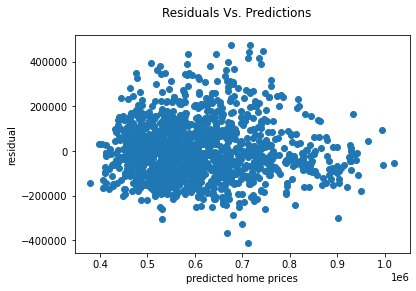

In [379]:
model_preds = model.predict(X_c)
resids = y - model_preds

fig, ax = plt.subplots()

ax.scatter(model_preds, resids)
ax.set_xlabel('predicted home prices')
ax.set_ylabel('residual')
plt.suptitle('Residuals Vs. Predictions');

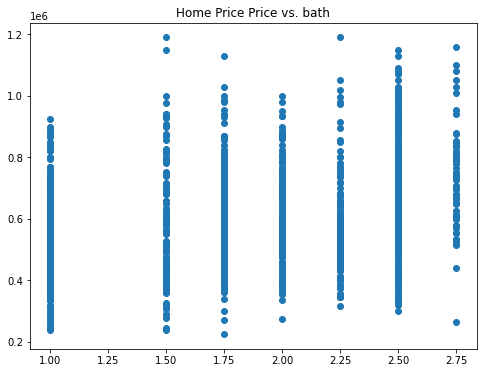

In [380]:
fig, ax = plt.subplots(ncols=1, figsize=(8, 6))


ax.scatter(X['bathrooms'], y)
ax.set_title('Home Price Price vs. bath');

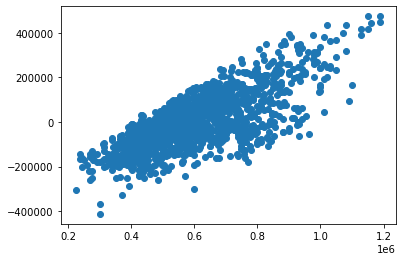

In [381]:
fig, ax = plt.subplots()

ax.scatter(y, resids);

In [382]:
dw = sm.stats.stattools.durbin_watson

In [383]:
dw(resids)

1.9996938505167432

In [384]:
model.summary().tables[2]

Omnibus:,99.461,Durbin-Watson:,2.000
Prob(Omnibus):,0.000,Jarque-Bera (JB):,123.543
Skew:,0.672,Prob(JB):,1.49e-27
Kurtosis:,3.635,Cond. No.,5.72e+03


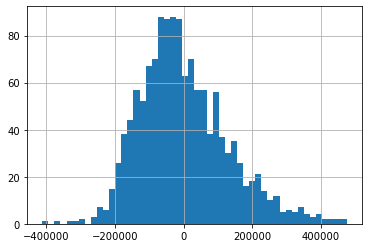

In [385]:
resids.hist(bins=50);

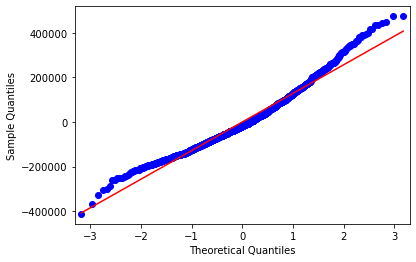

In [386]:
sm.qqplot(resids, line='r');

TypeError: 'method' object is not subscriptable

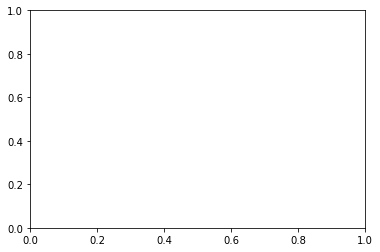

In [327]:
fig, ax = plt.subplots()

ax.scatter(y=clean_null['price'], x=zip_ohe_columns.drop['price'], axis=1);

In [325]:
model.summary().tables[2]

Omnibus:,297.063,Durbin-Watson:,1.987
Prob(Omnibus):,0.000,Jarque-Bera (JB):,585.292
Skew:,1.068,Prob(JB):,8.04e-128
Kurtosis:,4.988,Cond. No.,5.89e+03


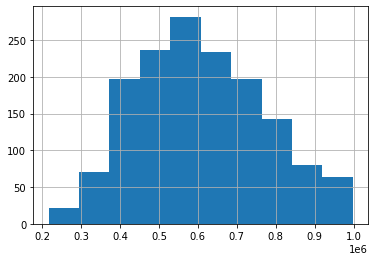

In [98]:
y.hist();

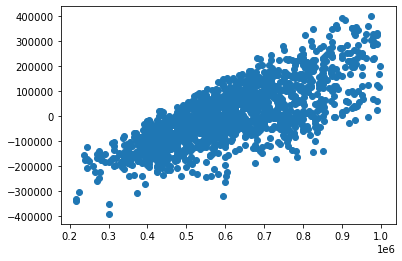

In [99]:
fig, ax = plt.subplots()

ax.scatter(y, resids);

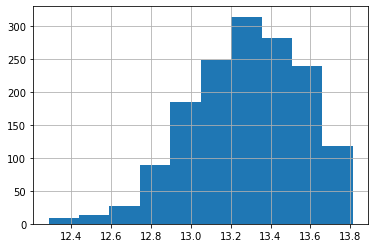

In [100]:
y_log = np.log(y)
y_log.hist();

In [103]:
# 'x1' is 
sm.graphics.plot_regress_exog(model, 'price', fig=plt.figure(figsize=(12, 8)));

ValueError: 'price' is not in list

<Figure size 864x576 with 0 Axes>